In [139]:
#importing pandas & numpy libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import math
import plotly.express as px

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

##### In this section, you’re expected to focus on network parameters like TCP retransmission, Round Trip Time (RTT), Throughput, and the customers’ device characteristics like the handset type to conduct a deep user experience analysis. The network parameters are all columns in the dataset.

In [140]:
exp_df = pd.read_csv('telcom_data.csv', na_values=['?',"n.a.","NA","n/a", "na", None])
exp_df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [141]:
#dropping Unnamed column as we don't Need this 

exp_df.drop(['Unnamed: 0'], axis=1, inplace=True)
exp_df.head(5)

KeyError: "['Unnamed: 0'] not found in axis"

In [142]:
select_col = exp_df[['MSISDN/Number','Handset Type','Avg RTT DL (ms)','Avg RTT UL (ms)',
                 'TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)',
                 'Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)']]
select_col

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.0,5.0,NaN,NaN,23.0,44.0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.0,5.0,NaN,NaN,16.0,26.0
2,3.376063e+10,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,6.0,9.0
3,3.375034e+10,undefined,NaN,NaN,NaN,NaN,44.0,44.0
4,3.369980e+10,Samsung Sm-G390F,NaN,NaN,NaN,NaN,6.0,9.0
...,...,...,...,...,...,...,...,...
149996,3.365069e+10,Apple iPhone 8 Plus (A1897),32.0,0.0,NaN,NaN,52.0,65.0
149997,3.366345e+10,Apple iPhone Se (A1723),27.0,2.0,NaN,NaN,23.0,54.0
149998,3.362189e+10,Apple iPhone Xs (A2097),43.0,6.0,NaN,NaN,43.0,47.0
149999,3.361962e+10,Huawei Fig-Lx1,37.0,5.0,NaN,NaN,34.0,37.0


In [143]:

select_col.isnull().sum(axis=0)

MSISDN/Number                   1066
Handset Type                     572
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
dtype: int64

### Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable):


In [144]:
select_col['MSISDN/Number'].fillna(value=exp_df['MSISDN/Number'].mean(), inplace=True)

In [145]:
select_col['Avg RTT DL (ms)'].fillna(value=exp_df['Avg RTT DL (ms)'].mean(), inplace=True)
select_col['Avg RTT UL (ms)'].fillna(value=exp_df['Avg RTT UL (ms)'].mean(), inplace=True)
select_col['Avg Bearer TP DL (kbps)'].fillna(value=exp_df['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
select_col['Avg Bearer TP UL (kbps)'].fillna(value=exp_df['Avg Bearer TP UL (kbps)'].mean(), inplace=True)
select_col['TCP DL Retrans. Vol (Bytes)'].fillna(value=exp_df['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
select_col['TCP UL Retrans. Vol (Bytes)'].fillna(value=exp_df['TCP UL Retrans. Vol (Bytes)'].mean(), inplace=True)

In [146]:
select_col.isnull().sum(axis=0)

MSISDN/Number                    0
Handset Type                   572
Avg RTT DL (ms)                  0
Avg RTT UL (ms)                  0
TCP DL Retrans. Vol (Bytes)      0
TCP UL Retrans. Vol (Bytes)      0
Avg Bearer TP DL (kbps)          0
Avg Bearer TP UL (kbps)          0
dtype: int64

### Average TCP retransmission

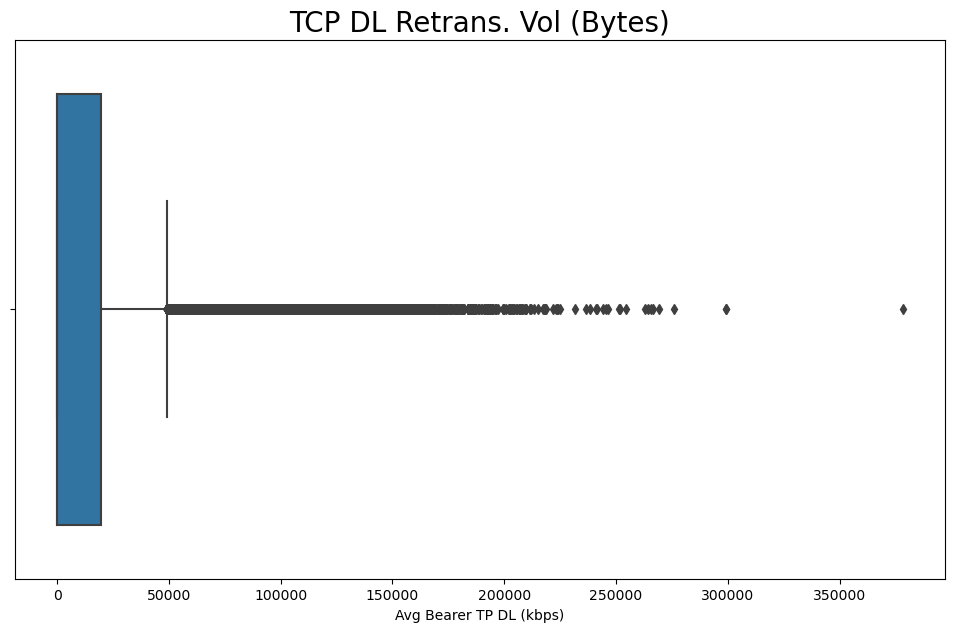

In [147]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=select_col, x='Avg Bearer TP DL (kbps)')
plt.title("TCP DL Retrans. Vol (Bytes)", size=20)
plt.show()

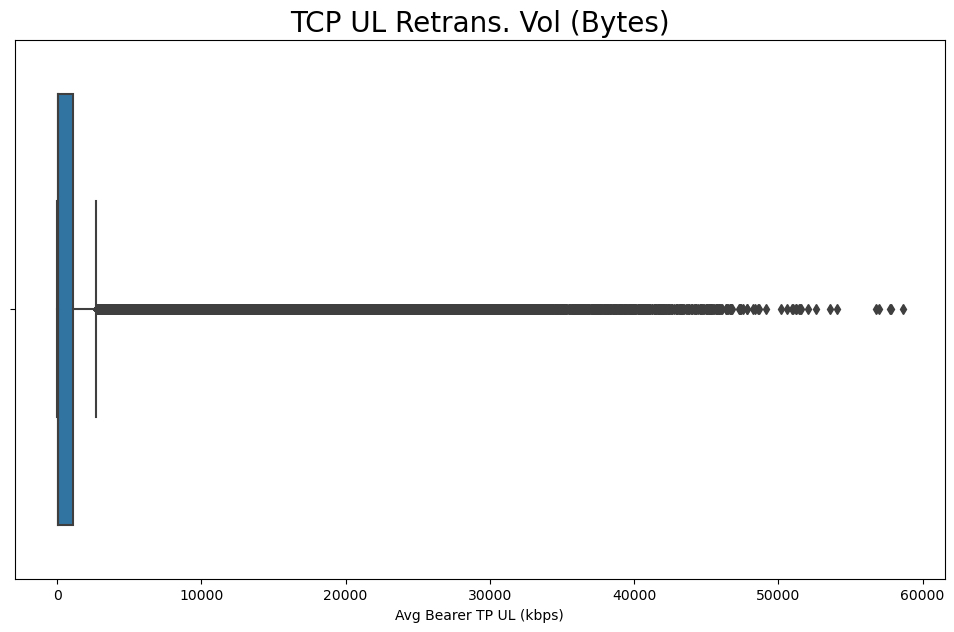

In [148]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=select_col, x='Avg Bearer TP UL (kbps)')
plt.title("TCP UL Retrans. Vol (Bytes)", size=20)
plt.show()

In [149]:
select_col['Avg RTT DL (ms)'] = np.where(select_col['Avg RTT DL (ms)'] > 220, 54, select_col['Avg RTT DL (ms)'])

In [150]:
#Printing the median and percentile of Avg RTT UL (ms)
select_col['Avg RTT UL (ms)'].describe()
select_col['Avg RTT DL (ms)'].describe()

count    150001.000000
mean         64.169484
std          37.817597
min           0.000000
25%          35.000000
50%          54.000000
75%         104.000000
max         220.000000
Name: Avg RTT DL (ms), dtype: float64

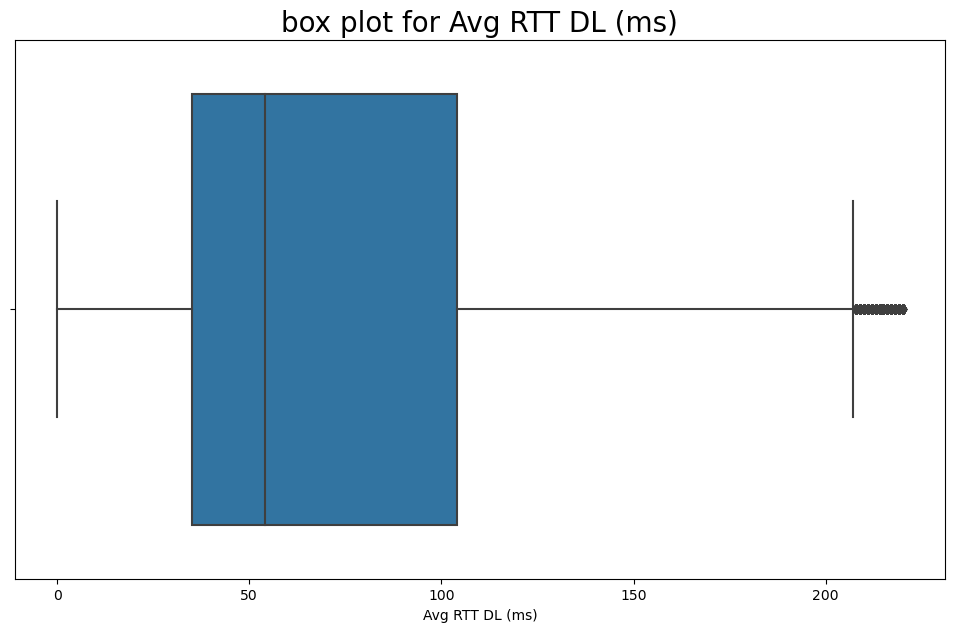

In [151]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=select_col, x='Avg RTT DL (ms)')
plt.title("box plot for Avg RTT DL (ms)", size=20)
plt.show()

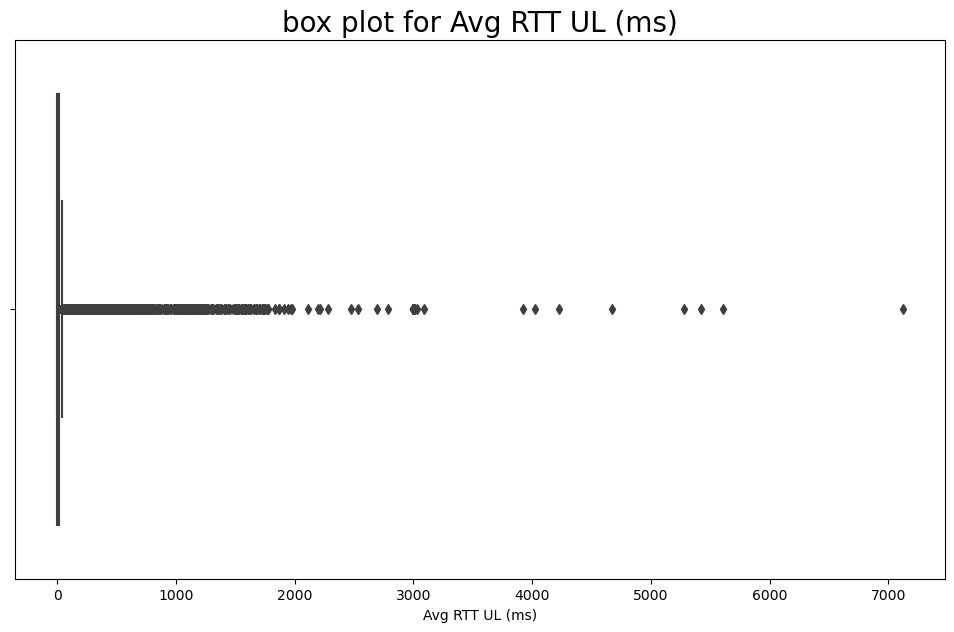

In [152]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=select_col, x='Avg RTT UL (ms)')
plt.title("box plot for Avg RTT UL (ms)", size=20)
plt.show()

In [153]:
select_col['Avg RTT DL (ms)'].describe()

count    150001.000000
mean         64.169484
std          37.817597
min           0.000000
25%          35.000000
50%          54.000000
75%         104.000000
max         220.000000
Name: Avg RTT DL (ms), dtype: float64

In [154]:
avg_tp_uldl_columns = [
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)'
]
avg_tp_uldl = select_col[avg_tp_uldl_columns].sum()

### Handset type

In [155]:
handsets_data = select_col.groupby('Handset Type')

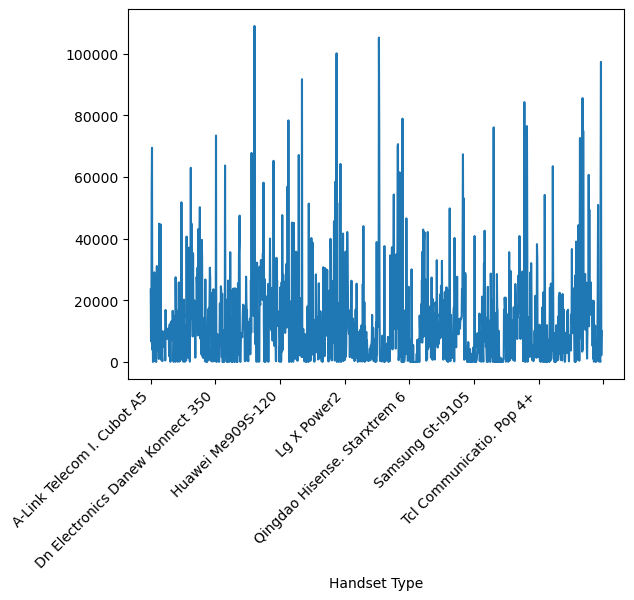

In [156]:
handsets_tp = handsets_data[avg_tp_uldl_columns].mean().sum(axis=1)
handsets_tp.plot()

# Remove overlapping from x-axis text
plt.xticks(rotation=45, ha='right')

plt.show()

In [157]:
select_col['Total_Avg_RTT'] = select_col['Avg RTT DL (ms)'] + select_col['Avg RTT UL (ms)']
select_col['Total_Avg_Bearer_TP'] = select_col['Avg Bearer TP DL (kbps)'] + select_col['Avg Bearer TP DL (kbps)']
select_col['Total_Avg_TCP'] = select_col['TCP DL Retrans. Vol (Bytes)'] + select_col['TCP UL Retrans. Vol (Bytes)']
select_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MSISDN/Number                150001 non-null  float64
 1   Handset Type                 149429 non-null  object 
 2   Avg RTT DL (ms)              150001 non-null  float64
 3   Avg RTT UL (ms)              150001 non-null  float64
 4   TCP DL Retrans. Vol (Bytes)  150001 non-null  float64
 5   TCP UL Retrans. Vol (Bytes)  150001 non-null  float64
 6   Avg Bearer TP DL (kbps)      150001 non-null  float64
 7   Avg Bearer TP UL (kbps)      150001 non-null  float64
 8   Total_Avg_RTT                150001 non-null  float64
 9   Total_Avg_Bearer_TP          150001 non-null  float64
 10  Total_Avg_TCP                150001 non-null  float64
dtypes: float64(10), object(1)
memory usage: 12.6+ MB


In [172]:
select_col.to_csv("../Telecommunication_Industry/formodel.csv")

### Task 3.2 - Compute & list 10 of the top, bottom, and most frequent:


### TCP values in the dataset.


In [158]:
# Sort the dataframe by 'Total_Avg_TCP' in descending order
sort_by_tcp = select_col.sort_values('Total_Avg_TCP', ascending=False)

# Extract the top 10 and last 10 values of 'Total_Avg_TCP'
tcp_top = sort_by_tcp.nlargest(10, 'Total_Avg_TCP')['Total_Avg_TCP']
tcp_bottom = sort_by_tcp.nsmallest(10, 'Total_Avg_TCP')['Total_Avg_TCP']

# Get the 10 most frequent values of 'Total_Avg_TCP'
tcp_most_frequent = select_col['Total_Avg_TCP'].value_counts().head(10)


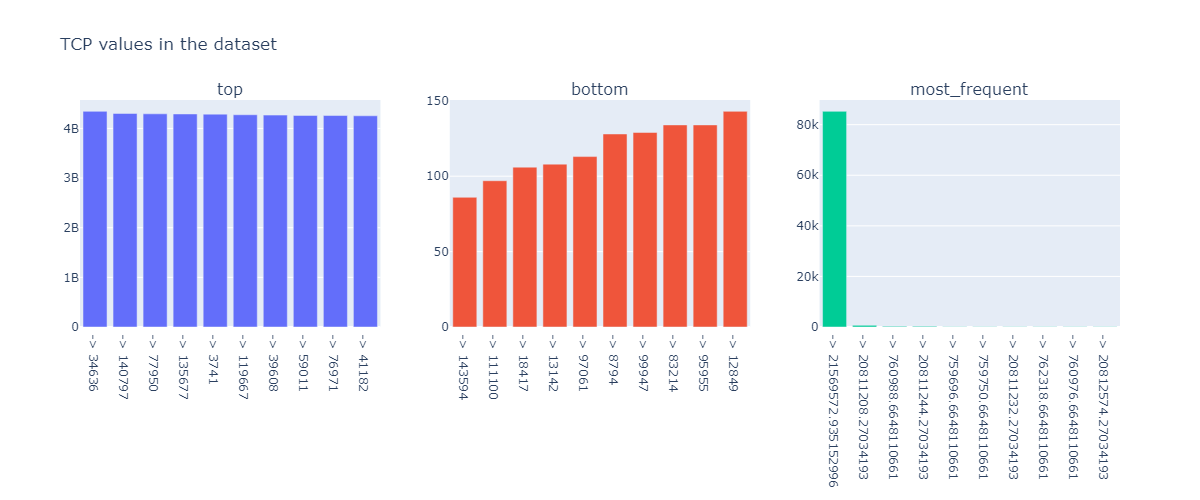

In [159]:
import plotly.io as pio
from IPython.display import Image
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def mult_hist(sr, rows, cols, title_text, subplot_titles, interactive=False):
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles)
    for i in range(rows):
        for j in range(cols):
            x = ["-> " + str(i) for i in sr[i+j].index]
            fig.add_trace(go.Bar(x=x, y=sr[i+j].values), row=i+1, col=j+1)
    fig.update_layout(showlegend=False, title_text=title_text)
    if(interactive):
        fig.show()
    else:
        return Image(pio.to_image(fig, format='png', width=1200))
mult_hist([tcp_top, tcp_bottom, tcp_most_frequent], 1,
          3, "TCP values in the dataset", ['top', 'bottom', 'most_frequent'])

### RTT values in the dataset.

In [160]:
sort_by_RTT = select_col.sort_values(
    'Total_Avg_RTT', ascending=False)
RTT_top= sort_by_RTT.head(10)['Total_Avg_RTT']
RTT_bottom = sort_by_RTT.tail(10)['Total_Avg_RTT']
RTT_most_frequent = select_col['Total_Avg_RTT'].value_counts().head(10)

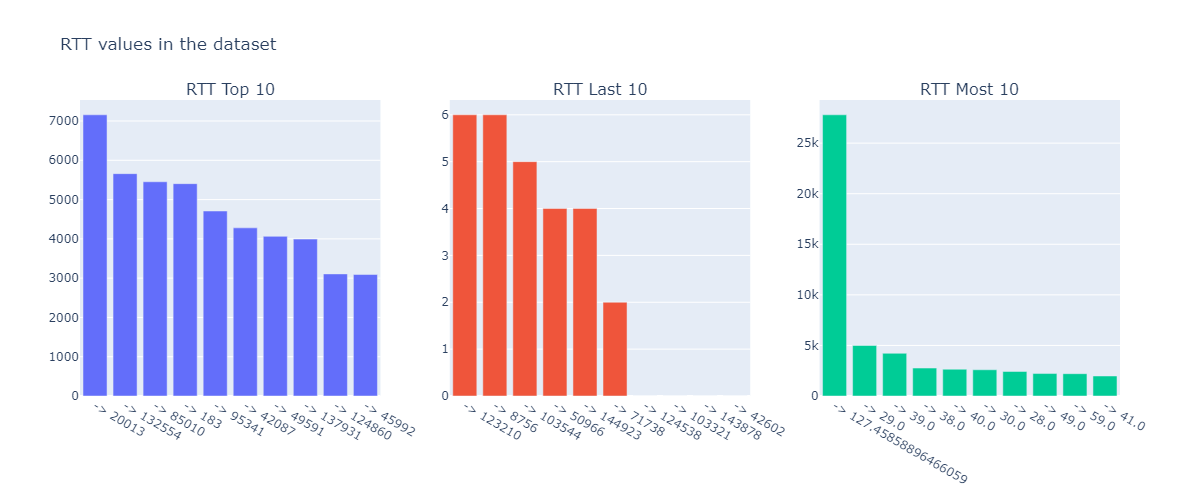

In [161]:
mult_hist([RTT_top, RTT_bottom, RTT_most_frequent], 1,
          3, "RTT values in the dataset", ['RTT Top 10', 'RTT Last 10', 'RTT Most 10'])

### Throughput values in the dataset.

In [162]:
sort_by_Bearer_TP = select_col.sort_values(
    'Total_Avg_Bearer_TP', ascending=False)
Bearer_TP_top = sort_by_Bearer_TP.head(10)['Total_Avg_Bearer_TP']
Bearer_TP_bottom = sort_by_Bearer_TP.tail(10)['Total_Avg_Bearer_TP']
Bearer_TP_most_frequent = select_col['Total_Avg_Bearer_TP'].value_counts().head(10)

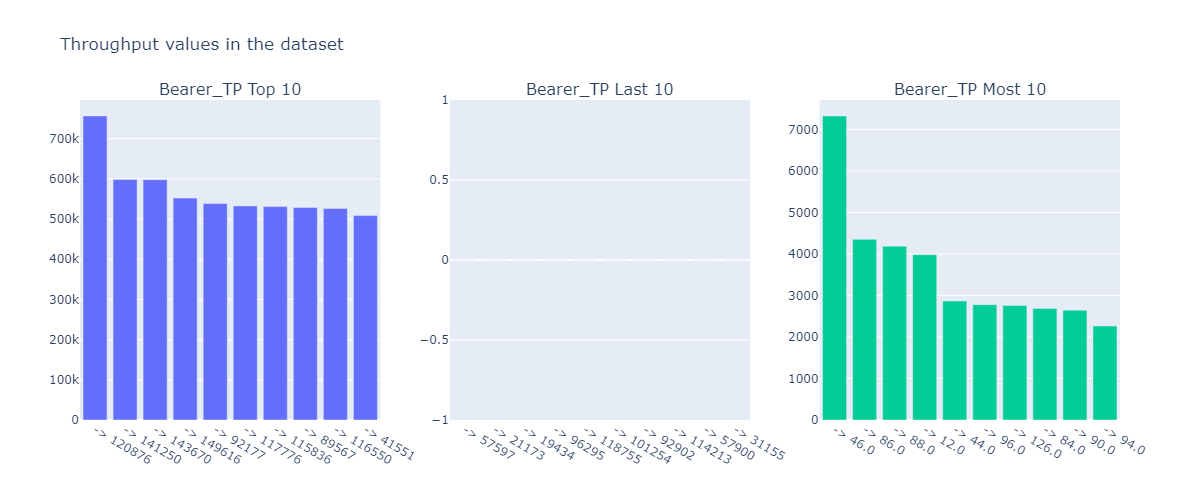

In [163]:
mult_hist([Bearer_TP_top, Bearer_TP_bottom, Bearer_TP_most_frequent], 1,
          3, "Throughput values in the dataset", ['Bearer_TP Top 10','Bearer_TP Last 10', 'Bearer_TP Most 10'])

### Task 3.3 - Compute & report:

### The distribution of the average throughput per handset type and provide interpretation for your findings.



In [164]:
handset_type_agg = select_col.groupby('Handset Type').agg({'Total_Avg_Bearer_TP': 'mean', 'Total_Avg_TCP': 'mean'})
handset_type_agg.head()

,Total_Avg_Bearer_TP,Total_Avg_TCP
Handset Type,,
A-Link Telecom I. Cubot A5,46368.0,2.156957e+07
A-Link Telecom I. Cubot Note Plus,13054.0,6.162130e+05
A-Link Telecom I. Cubot Note S,17030.0,4.141173e+07
A-Link Telecom I. Cubot Nova,111334.0,1.371700e+05
A-Link Telecom I. Cubot Power,138252.0,8.041000e+03


In [165]:

sort_by_tp = handset_type_agg.sort_values('Total_Avg_Bearer_TP', ascending=False)
top_tp = sort_by_tp['Total_Avg_Bearer_TP']
 
pd.DataFrame(top_tp.describe()) 

,Total_Avg_Bearer_TP
count,1396.000000
mean,22653.920712
std,27301.590942
min,0.000000
25%,2096.214286
50%,15448.716867
75%,31590.412162
max,209338.000000


### Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

In [166]:
Exp_metrics = select_col[[
    "Total_Avg_RTT",
    "Total_Avg_Bearer_TP",
    "Total_Avg_TCP"]].copy()
Exp_metrics.head()

,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,47.000000,46.0,2.156957e+07
1,70.000000,32.0,2.156957e+07
2,127.458589,12.0,2.156957e+07
3,127.458589,88.0,2.156957e+07
4,127.458589,12.0,2.156957e+07


In [ ]:
select_col.to_csv("../Telecommunication_Industry/experienced_data.csv")

In [167]:
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()
scaled_array = scaler.fit_transform(Exp_metrics)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.401384,-0.553863,0.0
1,-0.136348,-0.554155,0.0
2,0.525765,-0.554572,0.0
3,0.525765,-0.552987,0.0
4,0.525765,-0.554572,0.0


In [168]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2
0,-0.586808,-0.809726,0.0
1,-0.238921,-0.971039,0.0
2,0.688008,-0.725704,0.0
3,0.689044,-0.724719,0.0
4,0.688008,-0.725704,0.0


In [169]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_normalized)
kmeans.labels_

array([1, 1, 0, ..., 1, 1, 0])

In [170]:
select_col.insert(0, 'Cluster', kmeans.labels_)
select_col.head(10)

,Cluster,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,1,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,2.080991e+07,759658.664811,23.0,44.0,47.000000,46.0,2.156957e+07
1,1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,2.080991e+07,759658.664811,16.0,26.0,70.000000,32.0,2.156957e+07
2,0,3.376063e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,2.080991e+07,759658.664811,6.0,9.0,127.458589,12.0,2.156957e+07
3,0,3.375034e+10,undefined,109.795706,17.662883,2.080991e+07,759658.664811,44.0,44.0,127.458589,88.0,2.156957e+07
4,0,3.369980e+10,Samsung Sm-G390F,109.795706,17.662883,2.080991e+07,759658.664811,6.0,9.0,127.458589,12.0,2.156957e+07
5,0,3.366819e+10,undefined,109.795706,17.662883,2.080991e+07,759658.664811,70.0,54.0,127.458589,140.0,2.156957e+07
6,0,3.366537e+10,Huawei Mate 20 Lite,102.000000,5.000000,2.080991e+07,759658.664811,22.0,38.0,107.000000,44.0,2.156957e+07
7,1,3.376349e+10,undefined,39.000000,18.000000,1.952000e+04,759658.664811,3698.0,416.0,57.000000,7396.0,7.791787e+05
8,0,3.369874e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,2.080991e+07,759658.664811,46.0,49.0,127.458589,92.0,2.156957e+07
9,0,3.365922e+10,Samsung Galaxy Note 8 (Sm-N950F Ds),97.000000,7.000000,3.231397e+06,7230.000000,3845.0,2535.0,104.000000,7690.0,3.238627e+06


In [171]:
select_col.to_csv("../Telecommunication_Industry/experienced_data.csv")